In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, PrecisionRecallDisplay, precision_score, recall_score, roc_auc_score, RocCurveDisplay, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/etiem/Downloads/Recipe Reviews and User Feedback Dataset.csv')

In [3]:
df.head

<bound method NDFrame.head of        Unnamed: 0  recipe_number  recipe_code                    recipe_name  \
0               0              1        14299             Creamy White Chili   
1               1              1        14299             Creamy White Chili   
2               2              1        14299             Creamy White Chili   
3               3              1        14299             Creamy White Chili   
4               4              1        14299             Creamy White Chili   
...           ...            ...          ...                            ...   
18177         114            100        82745  Mamaw Emily’s Strawberry Cake   
18178         115            100        82745  Mamaw Emily’s Strawberry Cake   
18179         116            100        82745  Mamaw Emily’s Strawberry Cake   
18180         117            100        82745  Mamaw Emily’s Strawberry Cake   
18181         118            100        82745  Mamaw Emily’s Strawberry Cake   

         

In [4]:
df.columns

Index(['Unnamed: 0', 'recipe_number', 'recipe_code', 'recipe_name',
       'comment_id', 'user_id', 'user_name', 'user_reputation', 'created_at',
       'reply_count', 'thumbs_up', 'thumbs_down', 'stars', 'best_score',
       'text'],
      dtype='object')

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.describe()

,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18182.000000,18182.000000,18182.000000,18182.000000,1.818200e+04,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,121.465295,38.689363,21773.667253,2.159608,1.623710e+09,0.014630,1.089264,0.549335,4.288802,153.162138
std,116.747893,29.786647,23965.109637,10.014666,5.468697e+06,0.137974,4.201004,3.470124,1.544786,141.075316
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,150.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,520.000000,1.665756e+09,3.000000,106.000000,126.000000,5.000000,946.000000


In [9]:
df.head()

,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   recipe_number    18182 non-null  int64 
 1   recipe_code      18182 non-null  int64 
 2   recipe_name      18182 non-null  object
 3   comment_id       18182 non-null  object
 4   user_id          18182 non-null  object
 5   user_name        18182 non-null  object
 6   user_reputation  18182 non-null  int64 
 7   created_at       18182 non-null  int64 
 8   reply_count      18182 non-null  int64 
 9   thumbs_up        18182 non-null  int64 
 10  thumbs_down      18182 non-null  int64 
 11  stars            18182 non-null  int64 
 12  best_score       18182 non-null  int64 
 13  text             18180 non-null  object
dtypes: int64(9), object(5)
memory usage: 1.9+ MB


In [11]:
df['stars'].value_counts()

stars
5    13829
0     1696
4     1655
3      490
1      280
2      232
Name: count, dtype: int64

In [13]:
df['thumbs_down'].value_counts()

thumbs_down
0      15786
1       1198
2        388
3        184
4        113
5        102
6         68
7         46
9         35
8         30
10        26
11        24
13        21
12        19
15        18
14        15
21        10
16         9
19         7
17         7
18         6
20         5
26         4
32         4
25         4
23         3
27         3
31         3
24         3
22         3
39         3
46         3
37         3
65         2
33         2
71         2
30         2
34         1
61         1
126        1
40         1
49         1
87         1
104        1
28         1
69         1
55         1
63         1
38         1
78         1
70         1
29         1
41         1
122        1
112        1
62         1
109        1
42         1
Name: count, dtype: int64

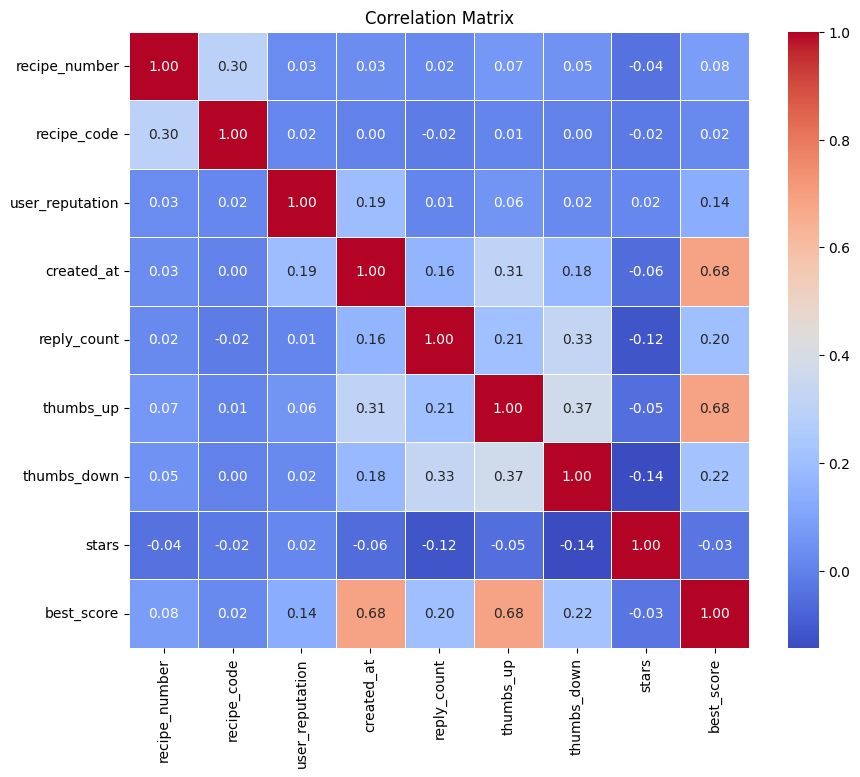

: 

In [ ]:
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

1. Accuracy:
Definition:

Accuracy measures the percentage of correctly classified instances (both positive and negative) out of the total number of instances.
 
What It Tells a User:

Accuracy provides a general sense of how often the model is correct.
High accuracy indicates that the model performs well overall.
Limitations:
Accuracy can be misleading when dealing with imbalanced datasets (e.g., when one class is much more common than another). For example, if 95% of the data belongs to one class, a model predicting only that class will have 95% accuracy but won't actually be useful.

 Precision:
Precision measures how many of the instances predicted as positive are actually positive.
​ 
What It Tells a User:

Precision focuses on the correctness of positive predictions.
High precision means that when the model predicts something as positive, it is very likely to be correct.
Useful In:
Applications where false positives are costly (e.g., spam email filtering, where marking a legitimate email as spam can be a problem).

Recall (or Sensitivity/True Positive Rate):
Recall measures how many of the actual positive instances were correctly identified by the model.

 What It Tells a User:

Recall emphasizes the model's ability to find all positive cases.
High recall means the model successfully identifies most of the actual positives.
Useful In:
Applications where false negatives are costly (e.g., medical diagnosis, where missing a positive case can have serious consequences).

Precision vs. Recall Trade-off:

A model can increase precision by being more conservative (e.g., predicting positive only when it is very certain), but this might lower recall.
Similarly, recall can be increased by predicting more positives, but this might reduce precision due to an increase in false positives.

How These Metrics Help:
Accuracy: Useful for a quick overview but may not reflect true performance in imbalanced datasets.
Precision: Helps when the cost of false positives is high.
Recall: Helps when the cost of false negatives is high.
By combining these metrics, a user can better understand the strengths and weaknesses of the model and its suitability for the specific problem. For example:

High Precision, Low Recall: The model is very cautious, avoiding false positives but missing some true positives.
Low Precision, High Recall: The model captures most positives but includes many false positives.

False Positive (FP):

What it means: A false positive occurs when the model predicts a positive class, but the actual class is negative.
Example: In a spam detection system:
A legitimate email is incorrectly classified as spam.
Why it matters:
FPs can cause unnecessary actions or interventions (e.g., missing important emails because they are in the spam folder).
Location in Confusion Matrix: It is in the Actual Negative row and the Predicted Positive column.
False Negative (FN):

What it means: A false negative occurs when the model predicts a negative class, but the actual class is positive.
Example: In a medical diagnosis model:
A sick patient is classified as healthy.
Why it matters:
FNs can be critical in applications where missing a positive case has severe consequences (e.g., failing to detect a disease).
Location in Confusion Matrix: It is in the Actual Positive row and the Predicted Negative column.

Key Insights:
FPs are problematic in scenarios where false alarms have high costs, such as spam filters or fraud detection (e.g., marking legitimate emails or transactions as suspicious).
FNs are critical in scenarios where missing a positive case has severe consequences, such as medical diagnosis or safety-critical systems.

Which of the following is the primary role of an activation function in a neural network?

Correct Answer: Introduce non-linearity into the model

Explanation: Activation functions enable neural networks to model complex, non-linear relationships by introducing non-linearity into the model. Without them, the network would behave like a linear model regardless of its depth.

Which optimizer adapts the learning rate for each parameter based on first and second-order moments of the gradients?

Correct Answer: Adam

Explanation: The Adam optimizer combines the benefits of both RMSProp and momentum by using estimates of first-order (mean) and second-order (variance) moments of the gradients to adapt the learning rate for each parameter.

What is the purpose of using dropout layers in a neural network?

Correct Answer: Prevent overfitting

Explanation: Dropout layers randomly deactivate a fraction of neurons during training, forcing the network to not rely too heavily on specific neurons. This reduces overfitting by encouraging the model to generalize better.

In collaborative filtering, recommendations are primarily based on:

Correct Answer: Both user-user and item-item similarities

Explanation: Collaborative filtering uses the similarity between users and items to make recommendations. It can involve comparing user preferences (user-user similarity) or item properties (item-item similarity).

What is the primary assumption of the ARIMA model in time series forecasting?

Correct Answer: The data is stationary, with constant mean and variance over time

Explanation: The ARIMA model assumes that the time series data is stationary. If it is not stationary, preprocessing steps like differencing are used to make it stationary by stabilizing the mean and variance over time.